In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

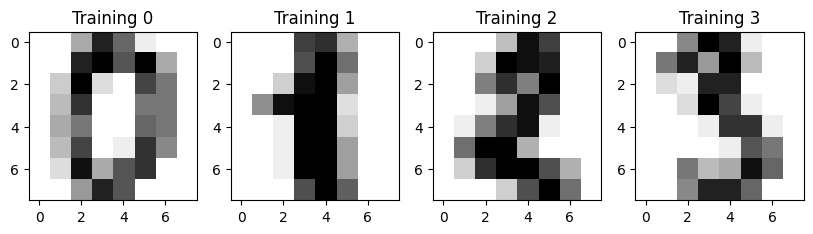

In [91]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

digits = load_digits()

fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap='gray_r', interpolation='antialiased')
    ax.set_title(f"Training {label}")

In [92]:
# df = pd.DataFrame(digits.data)

KNN accuracy: 0.99
Logistic Regression accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.98      1.00      0.99        86
           2       1.00      0.98      0.99        87
           3       0.99      0.99      0.99        84
           4       0.98      1.00      0.99        98
           5       1.00      0.97      0.99       103
           6       0.99      1.00      1.00       103
           7       1.00      0.99      0.99        81
           8       1.00      0.99      0.99        82
           9       0.96      0.98      0.97        91

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        84
           1       0.91      0.94      0.93        86
           2       0.97 

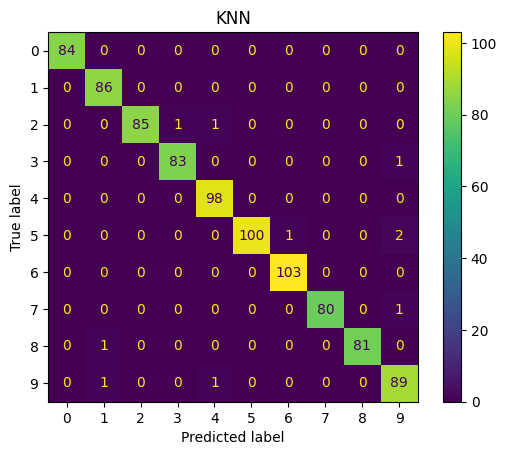

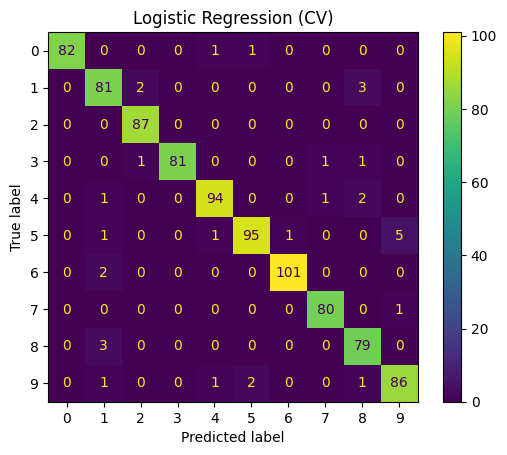

In [93]:
X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, train_size=0.5)

scaler = MinMaxScaler() #StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
log = LogisticRegressionCV(penalty='l2', max_iter=10000)

knn.fit(scaled_X_train, y_train)
log.fit(scaled_X_train, y_train)

y_knn = knn.predict(scaled_X_test)
y_log = log.predict(scaled_X_test)

print(f"KNN accuracy: {accuracy_score(y_test, y_knn):.2f}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test, y_log):.2f}")
KNNplot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_knn)).plot()
KNNplot.ax_.set_title('KNN')
LogPlot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_log)).plot()
LogPlot.ax_.set_title('Logistic Regression (CV)')
print(classification_report(y_test, y_knn))
print(classification_report(y_test, y_log))

In [94]:
error = 1-accuracy_score(y_test, y_knn)
error_list = []

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, y_train)
    y_hat = model_KNN.predict(scaled_X_test)
    error = 1-accuracy_score(y_test, y_hat)
    error_list.append(error)

[Text(0.5, 1.0, 'Elbow plot'), Text(0.5, 0, 'K'), Text(0, 0.5, 'Error')]

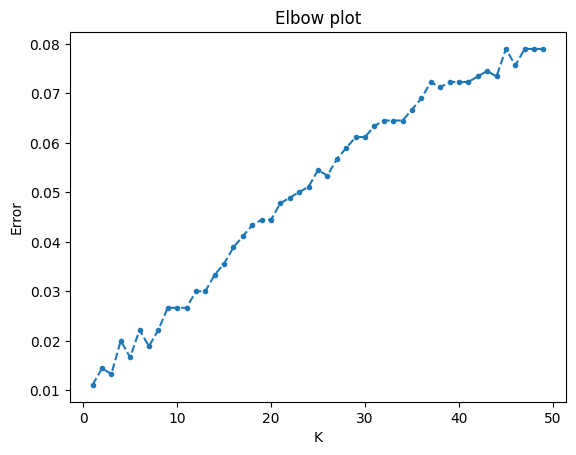

In [95]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1, len(error_list)+1), error_list, "--.")
ax.set(title="Elbow plot", xlabel="K", ylabel="Error")